# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as st
from sklearn.decomposition import PCA

from loguru import logger

In [2]:
'''# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()'''

'# Algumas configurações para o matplotlib.\n%matplotlib inline\n\nfrom IPython.core.pylabtools import figsize\n\n\nfigsize(12, 8)\n\nsns.set()'

In [3]:
fifa = pd.read_csv("fifa.csv", encoding = 'unicode_escape')

In [4]:
fifa.head()

,ï»¿,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,â¬226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,â¬127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,â¬228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,â¬138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,â¬196.4M


In [5]:
columns_to_drop = ["ï»¿", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

In [6]:
fifa.head()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


## Inicia sua análise a partir daqui

In [7]:
# Sua análise começa aqui.

# criar uma copia do dataset da fifa
df = fifa.copy()

# primeiras 5 linhas do dataset
## a primeira coluna parece ser um id
df.head()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [8]:
# dataframe auxiliar para analisar a consistencia das variaveis
cons = pd.DataFrame({'colunas' : df.columns,
                    'tipo': df.dtypes,
                    'missing': df.isna().sum(),
                    'size': df.shape[0],
                    'unicos': df.nunique()})

# uma coluna com o percentual de dados faltantes em cada variavel
cons['percentual'] = round(cons.missing/cons.size, 2)

In [9]:
# verificando quantas linhas e colunas o dataframe auxiliar tem
cons.shape

(37, 6)

In [10]:
# mudando o numero maximo de linhas que o pandas imprime
pd.options.display.max_rows = 100

In [11]:
# ordenando o dataframe pela coluna unicos em ordem decrescente
## assim poderemos identificar as colunas que funcionam como id
cons.sort_values(by = ['unicos'], ascending = False)

,colunas,tipo,missing,size,unicos,percentual
Positioning,Positioning,float64,48,18207,94,0.26
Dribbling,Dribbling,float64,48,18207,94,0.26
Finishing,Finishing,float64,48,18207,93,0.26
ShotPower,ShotPower,float64,48,18207,92,0.26
LongShots,LongShots,float64,48,18207,92,0.26
Marking,Marking,float64,48,18207,92,0.26
HeadingAccuracy,HeadingAccuracy,float64,48,18207,91,0.26
FKAccuracy,FKAccuracy,float64,48,18207,90,0.26
BallControl,BallControl,float64,48,18207,90,0.26
StandingTackle,StandingTackle,float64,48,18207,90,0.26


In [12]:
# tipos de colunas que existem no dataset
cons.tipo.value_counts()

float64    34
int64       3
Name: tipo, dtype: int64

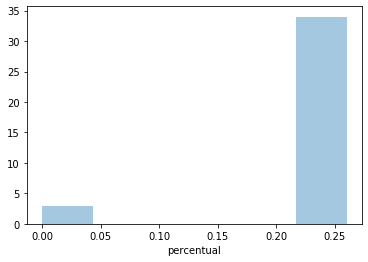

In [13]:
# distribuicao da % de dados faltantes por coluna
sns.distplot(cons.percentual, kde = False)

In [14]:
# excluir linhas com missing values
df_pca = df.dropna()

In [15]:
df_pca.shape

(18159, 37)

In [16]:
# instanciando o pca
from sklearn.decomposition import PCA
pca = PCA()

In [17]:
# aplicando o pca aos dados
pca.fit(df_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
#variancia explicada pelo primeiro componente
pca.explained_variance_ratio_[0]

0.5652805550008518

## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [19]:
def q1():
    var_explicada = round(float(pca.explained_variance_ratio_[0]),3)
    return var_explicada
    pass

In [20]:
q1()

0.565

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como un único escalar inteiro.

In [21]:
pca= PCA(0.95)
pca = pca.fit(df_pca)
pca.n_components_

15

In [22]:
def q2():
    n_pca = int(pca.n_components_)
    return n_pca
    pass

In [23]:
q2()

15

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [24]:
x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814,
     -35.55091139, -37.29814417, -28.68671182, -30.90902583,
     -42.37100061, -32.17082438, -28.86315326, -22.71193348,
     -38.36945867, -20.61407566, -22.72696734, -25.50360703,
     2.16339005, -27.96657305, -33.46004736,  -5.08943224,
     -30.21994603,   3.68803348, -36.10997302, -30.86899058,
     -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351,
     48.38377664,  47.60840355,  45.76793876,  44.61110193,
     49.28911284
]

In [25]:
pca = PCA()
pca= pca.fit(df_pca)
pca.components_

array([[-6.16388751e-03, -3.70623864e-02, -2.27401748e-02, ...,
         1.91129889e-01,  1.97401130e-01,  2.08994083e-01],
       [ 8.87203494e-03,  1.58367355e-04, -7.78142440e-03, ...,
        -5.14942445e-02, -5.14745248e-02, -5.52340572e-02],
       [ 9.84206291e-02,  2.04339855e-01,  9.50820413e-02, ...,
         2.93758717e-01,  3.07480231e-01,  3.20998523e-01],
       ...,
       [ 1.36565256e-03,  7.18377075e-03, -7.50009269e-04, ...,
        -4.84151364e-02, -4.47127432e-02,  6.56387319e-01],
       [ 5.53542477e-01,  6.30337955e-01,  2.43391671e-01, ...,
         1.16015772e-02, -1.80358372e-01, -1.53714829e-02],
       [ 5.64377667e-01, -6.46636967e-01,  5.04199457e-01, ...,
         7.95845835e-03, -1.18786610e-02,  3.10873931e-02]])

In [26]:
pca.components_.dot(x)[0:2]

array([186.55588031,  -6.59243177])

In [27]:
def q3():
    comp1=round(pca.components_.dot(x)[0:1][0],3)
    comp2=round(pca.components_.dot(x)[0:2][1],3)
    return tuple((comp1, comp2))
    pass

In [28]:
q3()

(186.556, -6.592)

## Questão 4

Realiza RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [34]:
df_pca.columns

Index(['Age', 'Overall', 'Potential', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [38]:
# importando a funcao
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# instanciando o modelo
reg= LinearRegression()
rfe = RFE(reg, n_features_to_select = 5)

# definir as variaveis
y = df_pca.Overall
x = df_pca.drop(columns ='Overall')

# selecionar as variaveis
var = rfe.fit(x, y)

# pegar os indices das colunas
ids = var.get_support(indices = True)

In [39]:
ids

array([ 0,  1, 11, 15, 35], dtype=int64)

In [42]:
def q4():
    # Lista com os nomes das colunas relevantes.
    colunas = list(x.columns[ids])
    return colunas
    pass

In [43]:
q4()

['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes']